In [1]:
import pandas as pd

In [108]:
df = pd.read_csv('data/alturas-pesos-mils-train.csv')

In [109]:
from sklearn.preprocessing import StandardScaler

In [111]:
sc = StandardScaler()

In [112]:
sc.fit(df[['Peso', 'Altura']])

StandardScaler()

In [116]:
df[['Peso_norm', 'Alt_norm']] = sc.transform(df[['Peso', 'Altura']])

In [121]:
df['coded_gen'] = (df['Genero'] == 'Mujer')*1

In [122]:
df

,Unnamed: 0,Genero,Peso,Altura,Peso_norm,Alt_norm,coded_gen
0,7620,Mujer,61.235,162.402,-0.791004,-0.581114,1
1,1837,Hombre,97.432,181.908,1.684210,1.403542,0
2,3311,Hombre,73.324,172.459,0.035663,0.442145,0
3,9478,Mujer,55.193,157.748,-1.204167,-1.054640,1
4,7805,Mujer,56.886,151.798,-1.088396,-1.660028,1
...,...,...,...,...,...,...,...
7995,6395,Mujer,62.215,160.083,-0.723990,-0.817063,1
7996,2714,Hombre,83.840,177.866,0.754765,0.992285,0
7997,3476,Hombre,75.461,170.910,0.181795,0.284540,0
7998,7084,Mujer,65.461,166.137,-0.502023,-0.201093,1


In [15]:
df['Peso'].max(), df['Peso'].min()

(121.68700000000001, 31.206999999999997)

In [16]:
df['Altura'].max(), df['Altura'].min()

(199.824, 138.866)

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
clf = LogisticRegression()

In [7]:
clf.fit(df[['Peso', 'Altura']], df['Genero'])

LogisticRegression()

In [8]:
clf.coef_, clf.intercept_

(array([[-0.4286322 ,  0.18549582]]), array([0.00347453]))

# Keras

In [197]:
from keras.models import Sequential
from keras.layers import Dense
import keras.optimizers as optim

In [208]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.summary()

model.compile(optimizer=optim.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics='Accuracy')
model.get_weights()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


[array([[-0.49595308],
        [ 1.3453645 ]], dtype=float32),
 array([0.], dtype=float32)]

In [209]:
hist = model.fit(df[['Peso_norm', 'Alt_norm']].values, df['coded_gen'].values, epochs=50)

Epoch 1/50
250/250 [==============================] - 0s 648us/step - loss: 0.9302 - Accuracy: 0.2794
Epoch 2/50
250/250 [==============================] - 0s 653us/step - loss: 0.7233 - Accuracy: 0.4893
Epoch 3/50
250/250 [==============================] - 0s 680us/step - loss: 0.5789 - Accuracy: 0.7846
Epoch 4/50
250/250 [==============================] - 0s 653us/step - loss: 0.4825 - Accuracy: 0.8954
Epoch 5/50
250/250 [==============================] - 0s 686us/step - loss: 0.4184 - Accuracy: 0.9153
Epoch 6/50
250/250 [==============================] - 0s 736us/step - loss: 0.3744 - Accuracy: 0.9146
Epoch 7/50
250/250 [==============================] - 0s 854us/step - loss: 0.3433 - Accuracy: 0.9125
Epoch 8/50
250/250 [==============================] - 0s 804us/step - loss: 0.3207 - Accuracy: 0.9090
Epoch 9/50
250/250 [==============================] - 0s 934us/step - loss: 0.3037 - Accuracy: 0.9072
Epoch 10/50
250/250 [==============================] - 0s 795us/step - loss: 0.290

In [210]:
model.get_weights()

[array([[-5.096652],
        [ 1.02123 ]], dtype=float32),
 array([-0.02632075], dtype=float32)]

In [211]:
model.loss

'binary_crossentropy'

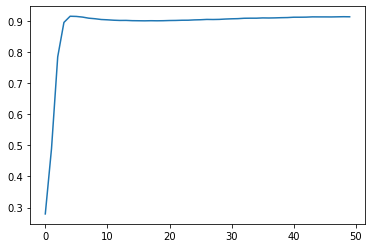

In [212]:
plt.plot(hist.history['Accuracy'])

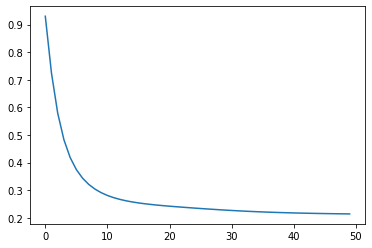

In [213]:
plt.plot(hist.history['loss'])

In [137]:
from matplotlib import pyplot as plt

In [138]:
df_hombres = df[df['Genero'] == 'Hombre']
df_mujeres = df[df['Genero'] == 'Mujer']

In [139]:
weights = model.get_weights()

In [140]:
weights

[array([[-4.8032055],
        [ 0.8074303]], dtype=float32),
 array([-0.02686926], dtype=float32)]

In [141]:
w1 = weights[0][0][0]
w2 = weights[0][1][0]
w0 = weights[1][0]

In [142]:
w1, w2, w0

(-4.8032055, 0.8074303, -0.026869263)

In [143]:
import numpy as np

In [144]:
pesos = np.linspace(-1, 1, 100)
alturas = - w0/w2 - w1*pesos/w2

In [145]:
# alturas

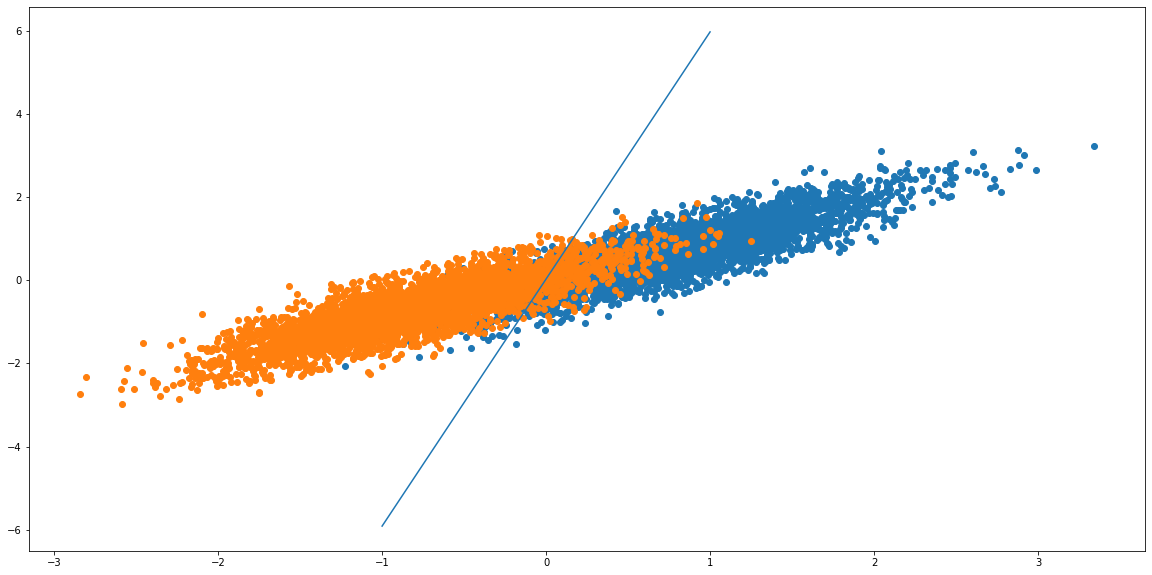

In [146]:
f = plt.figure(figsize=(20, 10))
plt.scatter(df_hombres['Peso_norm'], df_hombres['Alt_norm'])
plt.scatter(df_mujeres['Peso_norm'], df_mujeres['Alt_norm'])
plt.plot(pesos, alturas)

In [150]:
x = np.array([
    [80, 170],
    [50, 164]
])

In [156]:
x_norm = sc.transform(x)

In [157]:
x_norm

array([[ 0.49217931,  0.19195141],
       [-1.55927324, -0.41852414]])

In [155]:
model.predict(x_norm)

1/1 [==============================] - 0s 37ms/step


array([[0.09657089],
       [0.9991957 ]], dtype=float32)

In [158]:
sc.inverse_transform(x_norm)

array([[ 80., 170.],
       [ 50., 164.]])

In [215]:
model.evaluate(df[['Peso_norm', 'Alt_norm']].values, df['coded_gen'].values)

250/250 [==============================] - 0s 645us/step - loss: 0.2136 - Accuracy: 0.9133


[0.21362793445587158, 0.9132500290870667]